In [16]:
# Initial imports
import os
import requests
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv('.env')

True

In [49]:
#Reading sp_500
import yfinance as yf
stock = '^GSPC'
sp_500_df = yf.download(stock,'2020-01-03', '2020-10-02')
sp_500_df = pd.DataFrame(df)
sp_500_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
2020-01-09,3266.030029,3275.580078,3263.669922,3274.699951,3274.699951,3638390000


In [50]:
#Cleaning Sp_500
sp_500_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace = True)
sp_500_df.head()

,Close
Date,
2020-01-03,3234.850098
2020-01-06,3246.280029
2020-01-07,3237.179932
2020-01-08,3253.050049
2020-01-09,3274.699951


In [51]:
#Sp_500 Daily Returns
sp_500_daily_returns = sp_500_df.pct_change()
sp_500_daily_returns.head()

,Close
Date,
2020-01-03,NaN
2020-01-06,0.003533
2020-01-07,-0.002803
2020-01-08,0.004902
2020-01-09,0.006655


In [8]:
#Reading BVSP
stock = '^BVSP'
brazil_df = yf.download(stock,'2020-01-03', '2020-10-02')
brazil_df = pd.DataFrame(df)
brazil_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
2020-01-09,3266.030029,3275.580078,3263.669922,3274.699951,3274.699951,3638390000


In [9]:
#Reading BSESN
stock = '^BSESN'
india_df = yf.download(stock,'2020-01-03', '2020-10-02')
india_df = pd.DataFrame(df)
india_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
2020-01-09,3266.030029,3275.580078,3263.669922,3274.699951,3274.699951,3638390000


In [29]:
# Reading Coronavirus data csv's
US_csv = Path("Vanguard-Group/usa covid cases.csv")
US_coronavirus_data = pd.read_csv(US_csv, parse_dates = True, infer_datetime_format = True)
US_coronavirus_data.head()

,Date,Confirmed,Deaths
0,1/22/2020,0,0
1,1/22/2020,0,0
2,1/22/2020,0,0
3,1/22/2020,0,0
4,1/22/2020,0,0


In [30]:
#df.groupby(['date'], as_index = False).agg({'muscles': ','.join})
US_coronavirus_data = US_coronavirus_data.groupby(['Date']).sum()
US_coronavirus_data

,Confirmed,Deaths
Date,,
1/22/2020,1,0
1/23/2020,1,0
1/24/2020,2,0
1/25/2020,2,0
1/26/2020,5,0
...,...,...
7/5/2020,2891124,129960
7/6/2020,2936077,130285
7/7/2020,2996098,131480


In [39]:
US_coronavirus_data.index = pd.to_datetime(US_coronavirus_data.index)
US_coronavirus_data

,Confirmed,Deaths
Date,,
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,2,0
2020-01-26,5,0
...,...,...
2020-07-05,2891124,129960
2020-07-06,2936077,130285
2020-07-07,2996098,131480


In [53]:
US_coronavirus_data_returns = US_coronavirus_data.pct_change()
US_coronavirus_data_returns.tail()

,Confirmed,Deaths
Date,,
2020-07-05,0.017557,0.002090
2020-07-06,0.015549,0.002501
2020-07-07,0.020443,0.009172
2020-07-08,0.019559,0.006237
2020-07-09,0.020705,0.007483


In [17]:
# Reading Coronavirus data csv's
Brazil_csv = Path("Vanguard-Group/brazil_covid19.csv")
Brazil_coronavirus_data = pd.read_csv(Brazil_csv)
Brazil_coronavirus_data.head()

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0


In [18]:
# Reading Coronavirus data csv's
India_csv = Path("Vanguard-Group/India Cases Covid.csv")
India_coronavirus_data = pd.read_csv(India_csv)
India_coronavirus_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,4,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,5,3/2/2020,6:00 PM,Kerala,3,0,0,0,3


In [56]:
#sp_500_daily_returns and US_coronavirus_data_returns
combined_US_returns = pd.concat([sp_500_daily_returns, US_coronavirus_data_returns], axis='columns', join='inner')
combined_US_returns.head()

,Close,Confirmed,Deaths
Date,,,
2020-01-22,0.000289,NaN,NaN
2020-01-23,0.001141,0.0,NaN
2020-01-24,-0.009042,1.0,NaN
2020-01-27,-0.015731,0.0,NaN
2020-01-28,0.010054,0.0,NaN


In [92]:
combined_US_returns.dropna(inplace = True)

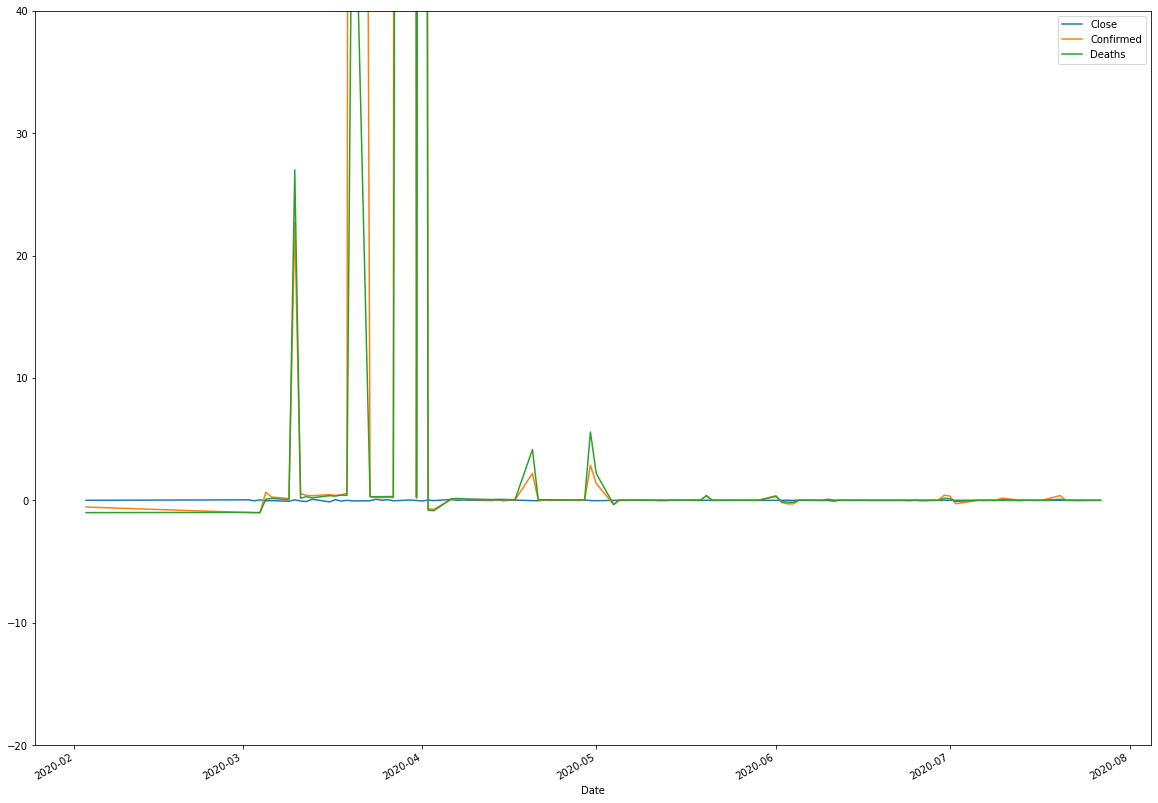

In [93]:
combined_US_returns.plot(kind = 'line', figsize = (20,15), ylim = (-20, 40))

In [94]:
US_correlation = combined_US_returns.corr()
US_correlation

,Close,Confirmed,Deaths
Close,1.000000,0.051573,0.019359
Confirmed,0.051573,1.000000,0.958285
Deaths,0.019359,0.958285,1.000000


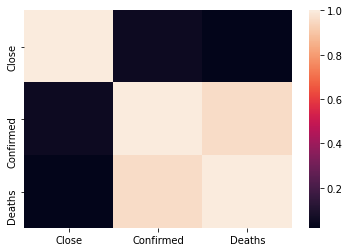

In [95]:
import seaborn as sns
sns.heatmap(US_correlation)